In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline
%aimport train
from utils.mnist_utils import load_data
import os
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np
import scikitplot as skplt
from train import train

## Explore data locally


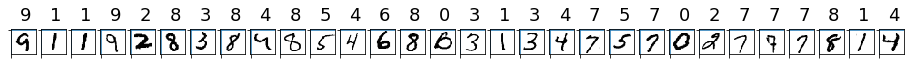

In [2]:
data_folder = os.path.join(os.getcwd(), '../data')

X_train = load_data(os.path.join(data_folder, 'train-images.gz'), False) / 255.0
X_test = load_data(os.path.join(data_folder, 'test-images.gz'), False) / 255.0
y_train = load_data(os.path.join(data_folder, 'train-labels.gz'), True).reshape(-1)
y_test = load_data(os.path.join(data_folder, 'test-labels.gz'), True).reshape(-1)

# Random images
count = 0
sample_size = 30
plt.figure(figsize = (16, 6))
for i in np.random.permutation(X_train.shape[0])[:sample_size]:
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i], fontsize=18)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.Greys)
plt.show()

## Train the model

In [3]:
clf = train('../data',0.01,'../outputs/sklearn_mnist_model.pkl')

(60000, 784)
(60000,)
(10000, 784)
(10000,)
Train a logistic regression model with regularization rate of 0.01
Predict the test set
Accuracy is 0.9257
Attempted to log scalar metric regularization rate:
0.01
Attempted to log scalar metric accuracy:
0.9257


/Users/pj/.local/share/virtualenvs/mlops-demo2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Plot results

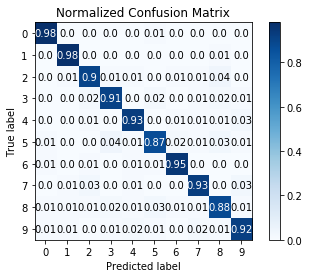

In [4]:
skplt.metrics.plot_confusion_matrix(y_test, clf.predict(X_test), normalize=True)
plt.show()